In [258]:
#imports
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Creating the connection
cnx = sqlite3.connect(r'kinara_assessment_20181008.db')

## Loan information

In [103]:
# create the dataframe from a query
df_loan = pd.read_sql_query("SELECT * FROM loan_information", cnx)

In [104]:
df_loan.shape

(2662, 7)

In [105]:
df_loan.head(2)

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id
0,5692,TLMFS0000055,17850,6278,2017-03-07,TLMFS,46
1,6190,TLWCU0001219,17857,6280,2017-03-07,TLWCU,32


In [106]:
df_loan.loan_id.value_counts().head()    ##primary key

10239    1
9356     1
9352     1
9350     1
9348     1
Name: loan_id, dtype: int64

In [107]:
df_loan.account_number.value_counts().head()  #not a primary key because it has null values.

TLWCU0001933    1
TLWCS0000832    1
TLWCU0001898    1
TLWCS0001028    1
TLWCU0002118    1
Name: account_number, dtype: int64

In [108]:
df_loan.isnull().sum()

loan_id              0
account_number    1115
customer_id          0
enterprise_id        0
screening_date       0
product_code      1056
hub_id               0
dtype: int64

## Scores information

In [109]:
df_score = pd.read_sql_query("SELECT * FROM scores_information", cnx)

In [110]:
df_score.shape

(2033, 4)

In [111]:
df_score.head(5)

,loan_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP
0,5692,32,Cash & Non Banked,0
1,6190,35,Cash & Non Banked,0
2,6191,32,Cash & Non Banked,0
3,6193,39,Cash & Non Banked,548
4,8581,36,Cash & Non Banked,0


In [112]:
df_score.loan_id.value_counts().head()

10239    1
9372     1
9340     1
9342     1
9344     1
Name: loan_id, dtype: int64

## Enterprise information

In [113]:
df_epc= pd.read_sql_query("SELECT * FROM enteprise_information", cnx)

In [114]:
df_epc.shape

(2589, 4)

In [115]:
df_epc.head(2)

,enterprise_id,business_type,business_activity,business_sector
0,4,Manufacturing,Sales,Printing
1,7,Manufacturing,Job Work & Sales,Fabrication


## Disbursements Information

In [116]:
df_dis = pd.read_sql_query("SELECT * FROM disbursements_information", cnx)

In [117]:
df_dis.shape

(1575, 3)

In [118]:
df_dis.head(2)

,account_number,net_disbursement_magnitude,transaction_Date
0,TLWCS0000594,276196.0,2017-02-28
1,TLWCS0000609,731482.0,2017-02-28


In [119]:
df_dis.account_number.value_counts().head(31)

TLAPS0000438    2
TLAPS0000355    2
TLAPS0000305    2
TLAPS0000375    2
TLAPS0000406    2
TLAPS0000327    2
TLAPS0000412    2
TLAPS0000294    2
TLAPS0000262    2
TLAPS0000295    2
TLAPS0000446    2
TLAPS0000437    2
TLAPS0000416    2
TLAPS0000266    2
TLAPS0000340    2
TLAPS0000358    2
TLAPS0000388    2
TLAPS0000414    2
TLAPS0000362    2
TLAPS0000318    2
TLAPS0000379    2
TLAPS0000434    2
TLAPS0000407    2
TLAPS0000390    2
TLAPS0000424    2
TLAPS0000321    2
TLAPS0000425    2
TLAPS0000383    2
TLAPS0000381    2
TLAPS0000246    2
TLWCS0000852    1
Name: account_number, dtype: int64

In [120]:
## 30 account numbers are repeated.it means two times those account numbers with sucess loan transaction

- It is clearly said that for the customers who dont have accout_numbers,they are considered that there loan appliaction is rejected
- Here ,loan_information be the parent table where all 3 tabales are joined using left outer join to get a target varibale (loan acceptance or loan rejection)

# My Approach
- joining loan_information table with other three tables with Left Outer Join
- Target Varible is added based on null values of Account_numbers
- Understanding the data (taking insights)
- Cleaning the data (removing dupliacate account_numbers,loan_id's) for model
- removing the unrelavent features which cant explain the loan acceptance or rejection
- Missing value Treatment
- Model selection
- Recommendations

In [121]:
# Joining the tablels #left outer join

In [122]:
data=pd.read_sql_query("SELECT l.loan_id,l.account_number,l.customer_id,l.enterprise_id,l.screening_date,l.product_code,l.hub_id,s.ManagAgeui_APP,s.BusinFormalityOfTheBusinessui,s.ManagCBscoreui_APP,e.business_type,e.business_activity,e.business_sector,d.net_disbursement_magnitude,d.transaction_Date from loan_information l left outer join scores_information s on l.loan_id=s.loan_id left outer join  enteprise_information e on l.enterprise_id=e.enterprise_id left outer join disbursements_information d on l.account_number=d.account_number ", cnx)

In [123]:
data.shape

(2692, 15)

In [124]:
data.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,business_type,business_activity,business_sector,net_disbursement_magnitude,transaction_Date
0,5692,TLMFS0000055,17850,6278,2017-03-07,TLMFS,46,32,Cash & Non Banked,0,Manufacturing,Job Work,Auto Components,345909.0,2017-02-28
1,6190,TLWCU0001219,17857,6280,2017-03-07,TLWCU,32,35,Cash & Non Banked,0,Trading,Retail,Book Stores,144157.0,2017-02-28
2,6191,TLAPS0000292,9481,2916,2017-03-07,TLAPS,32,32,Cash & Non Banked,0,Manufacturing,Sales,Electricals,484931.0,2017-03-23
3,6192,LCRIU0000019,6597,32,2017-03-10,LCRIU,32,None,None,None,Manufacturing,Job Work & Sales,Auto Components,683859.0,2017-03-13
4,6193,LCRIU0000020,9732,3167,2017-03-13,LCRIU,32,39,Cash & Non Banked,548,Manufacturing,Job Work,Auto Components,896703.0,2017-03-15


In [125]:
data.isnull().sum()

loan_id                             0
account_number                   1115
customer_id                         0
enterprise_id                       0
screening_date                      0
product_code                     1056
hub_id                              0
ManagAgeui_APP                    705
BusinFormalityOfTheBusinessui     631
ManagCBscoreui_APP                705
business_type                       0
business_activity                   0
business_sector                     2
net_disbursement_magnitude       1117
transaction_Date                 1117
dtype: int64

## EDA

In [126]:
data.account_number.value_counts().head(31)

TLAPS0000318    2
TLAPS0000295    2
TLAPS0000294    2
TLAPS0000246    2
TLAPS0000379    2
TLAPS0000327    2
TLAPS0000340    2
TLAPS0000375    2
TLAPS0000416    2
TLAPS0000412    2
TLAPS0000407    2
TLAPS0000424    2
TLAPS0000358    2
TLAPS0000438    2
TLAPS0000425    2
TLAPS0000446    2
TLAPS0000362    2
TLAPS0000414    2
TLAPS0000262    2
TLAPS0000388    2
TLAPS0000355    2
TLAPS0000266    2
TLAPS0000437    2
TLAPS0000321    2
TLAPS0000381    2
TLAPS0000434    2
TLAPS0000390    2
TLAPS0000383    2
TLAPS0000305    2
TLAPS0000406    2
TLWCS0000804    1
Name: account_number, dtype: int64

In [127]:
#30 account_numbers are being repeated ,means applied loan for two times

In [128]:
data.customer_id.value_counts().head()

24221    8
24277    4
6684     4
6923     3
20437    3
Name: customer_id, dtype: int64

In [129]:
data[data.customer_id==24221]   #he's been rejected for 8 times 

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,business_type,business_activity,business_sector,net_disbursement_magnitude,transaction_Date
2425,11032,None,24221,8439,2017-05-22,None,35,None,None,None,Manufacturing,Job Work & Sales,Plastics,NaN,None
2479,11084,None,24221,8439,2017-05-23,None,35,35,Cash & Non Banked,744,Manufacturing,Job Work & Sales,Plastics,NaN,None
2499,11104,None,24221,8439,2017-05-24,None,35,None,None,None,Manufacturing,Job Work & Sales,Plastics,NaN,None
2518,11123,None,24221,8439,2017-05-24,None,35,None,None,None,Manufacturing,Job Work & Sales,Plastics,NaN,None
2531,11136,None,24221,8439,2017-05-24,None,35,None,None,None,Manufacturing,Job Work & Sales,Plastics,NaN,None
2555,11159,None,24221,8439,2017-05-25,None,35,None,None,None,Manufacturing,Job Work & Sales,Plastics,NaN,None
2611,11213,None,24221,8439,2017-05-26,None,35,None,None,None,Manufacturing,Job Work & Sales,Plastics,NaN,None
2612,11214,None,24221,8439,2017-05-26,None,35,35,Cash & Non Banked,801,Manufacturing,Job Work & Sales,Plastics,NaN,None


- since 30 account numbers are being repeated,i can remove the duplicates

In [130]:
data1=data.drop_duplicates(subset=['loan_id'])

# Problem statement given that if he or she has no account number ,it is concidered that loan has rejected

### If the account number has null value ,i mapped target to 0 and vice versa

#### 1- loan sanctioned
#### 0 - loan rejected

In [131]:
## adding target variable
data1['target'] = data1['account_number'].apply(lambda x: 0 if x==None else 1)

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [132]:
data1.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,business_type,business_activity,business_sector,net_disbursement_magnitude,transaction_Date,target
0,5692,TLMFS0000055,17850,6278,2017-03-07,TLMFS,46,32,Cash & Non Banked,0,Manufacturing,Job Work,Auto Components,345909.0,2017-02-28,1
1,6190,TLWCU0001219,17857,6280,2017-03-07,TLWCU,32,35,Cash & Non Banked,0,Trading,Retail,Book Stores,144157.0,2017-02-28,1
2,6191,TLAPS0000292,9481,2916,2017-03-07,TLAPS,32,32,Cash & Non Banked,0,Manufacturing,Sales,Electricals,484931.0,2017-03-23,1
3,6192,LCRIU0000019,6597,32,2017-03-10,LCRIU,32,None,None,None,Manufacturing,Job Work & Sales,Auto Components,683859.0,2017-03-13,1
4,6193,LCRIU0000020,9732,3167,2017-03-13,LCRIU,32,39,Cash & Non Banked,548,Manufacturing,Job Work,Auto Components,896703.0,2017-03-15,1


In [133]:
data1.shape

(2662, 16)

In [134]:
data1.loan_id.value_counts().head()

10239    1
9356     1
9352     1
9350     1
9348     1
Name: loan_id, dtype: int64

In [135]:
data1.account_number.value_counts().head()

TLWCU0001933    1
TLWCS0000832    1
TLWCU0001898    1
TLWCS0001028    1
TLWCU0002118    1
Name: account_number, dtype: int64

In [138]:
data1.target.value_counts()

1    1547
0    1115
Name: target, dtype: int64

In [139]:
data1.shape

(2662, 16)

In [140]:
df_loan.shape

(2662, 7)

In [141]:
df_loan.account_number.value_counts().head()

TLWCU0001933    1
TLWCS0000832    1
TLWCU0001898    1
TLWCS0001028    1
TLWCU0002118    1
Name: account_number, dtype: int64

In [142]:
data1.shape

(2662, 16)

In [143]:
df_loan.shape

(2662, 7)

# Understanding the data

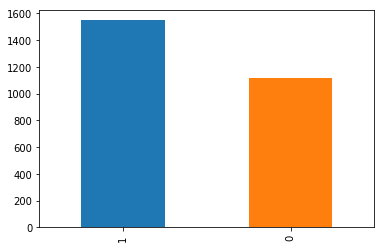

In [144]:
data1.target.value_counts().plot(kind='bar')   # 1 is got loan  ,0 means rejected

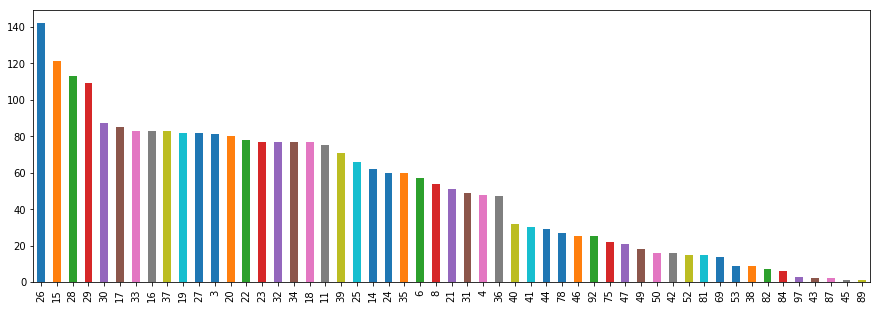

In [145]:
plt.figure(figsize=(15,5))
data1.hub_id.value_counts().plot(kind="bar")

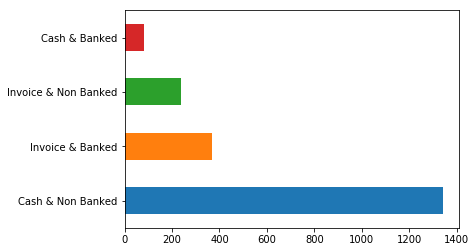

In [146]:
data1.BusinFormalityOfTheBusinessui.value_counts().plot(kind="barh")

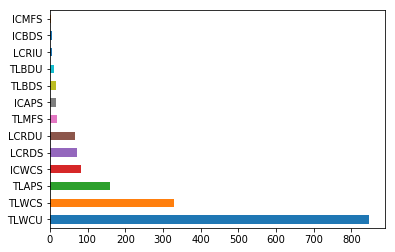

In [147]:
data.product_code.value_counts().plot(kind="barh")

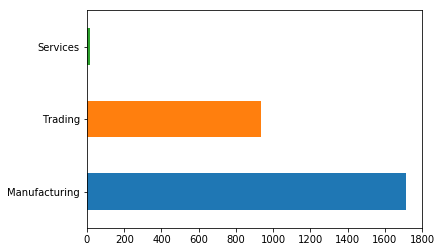

In [148]:
data1.business_type.value_counts().plot(kind="barh")

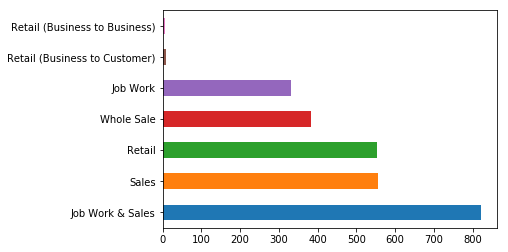

In [149]:
data1.business_activity.value_counts().plot(kind="barh")

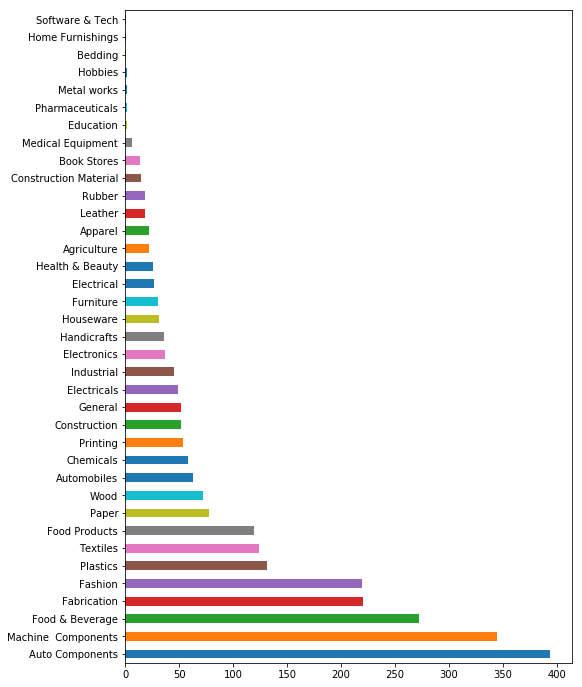

In [150]:
plt.figure(figsize=(8,12))
data1.business_sector.value_counts().plot(kind="barh")

In [151]:
#label  encoding for facet graphs
import numpy as np

In [152]:
data1['product_code']=data1['product_code'].map({'TLMFS':1, 'TLWCU':2, 'TLAPS':3, 'LCRIU':4, 'TLWCS':5, 'LCRDS':6, None:np.NaN,
       'ICWCS':7, 'LCRDU':8, 'ICAPS':9, 'ICMFS':10, 'TLBDU':11, 'ICBDS':12, 'TLBDS':13})

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [153]:
data1['BusinFormalityOfTheBusinessui']=data1['BusinFormalityOfTheBusinessui'].map({'Cash & Non Banked':1, None:np.NaN, 'Invoice & Banked':2,
       'Invoice & Non Banked':3, 'Cash & Banked':4})

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [154]:
data1['business_type']=data1['business_type'].map({'Manufacturing':1, 'Trading':2, 'Services':3})

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [155]:
data1['business_activity']=data1['business_activity'].map({'Job Work':1, 'Retail':2, 'Sales':3, 'Job Work & Sales':4, 'Whole Sale':5,
       'Retail (Business to Customer)':6, 'Retail (Business to Business)':7})

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [156]:
data1['business_sector']=data1['business_sector'].map({'Auto Components':1, 'Book Stores':2, 'Electricals':3,
       'Machine  Components':4, 'Wood':5, None:np.NaN, 'Fabrication':6,
       'Food & Beverage':7, 'Industrial':8, 'Fashion':9, 'Electrical':10,
       'Food Products':11, 'Chemicals':12, 'Plastics':13, 'Textiles':14, 'Printing':15,
       'Construction':16, 'Electronics':17, 'Furniture':18, 'General':19, 'Education':20,
       'Health & Beauty':21, 'Houseware':22, 'Medical Equipment':23, 'Paper':24,
       'Automobiles':25, 'Handicrafts':26, 'Rubber':27, 'Bedding':28, 'Leather':29,
       'Construction Material':30, 'Software & Tech':31, 'Apparel':32,
       'Agriculture':33, 'Pharmaceuticals':34, 'Metal works':35, 'Hobbies':36,
       'Home Furnishings':37})

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


## Lets see how Target variable varies with respect to features

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


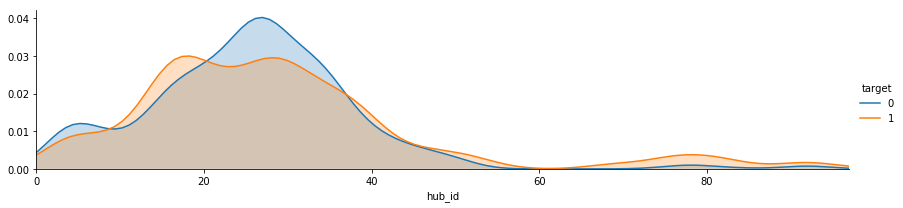

In [157]:
#facet graphs
facet = sns.FacetGrid(data1, hue="target",aspect=4)
facet.map(sns.kdeplot,'hub_id',shade= True)
facet.set(xlim=(0, data1['hub_id'].max()))
facet.add_legend();

- for hub_id in between 10-20 ,customers are more likely to get the loan sanction
- for hub_id between 23-35 , customers are more likely to get loan rejection
- for hub_id =80, customers are more likely to get loan sanction.

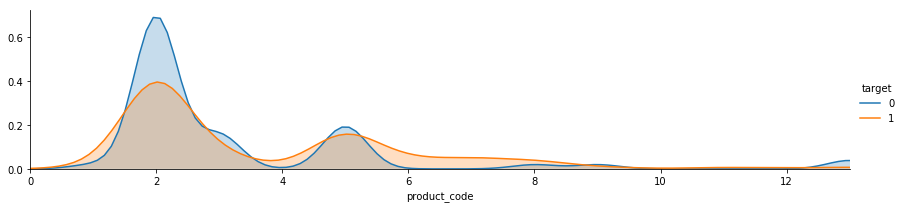

In [158]:
#facet graphs
facet = sns.FacetGrid(data1, hue="target",aspect=4)
facet.map(sns.kdeplot,'product_code',shade= True)
facet.set(xlim=(0, data1['product_code'].max()))
facet.add_legend();

- for product_code 2 which is TLWCU ,they are high number of loan rejections
- for product_code 4, 6 and 7 ie LCRIU , LCRDS , ICWCS ,customers are more likely to get loan sanction
- for product_code 5 ie TLWCS ,customers are more likely to get loan rejection 

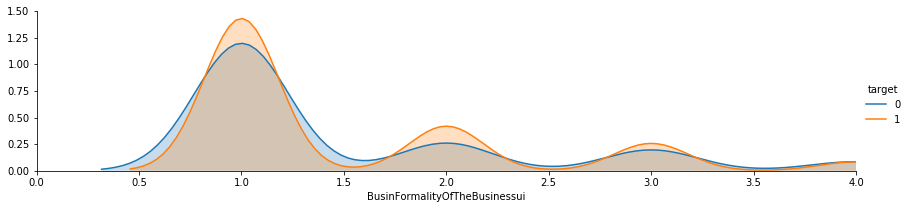

In [159]:
facet = sns.FacetGrid(data1, hue="target",aspect=4)
facet.map(sns.kdeplot,'BusinFormalityOfTheBusinessui',shade= True)
facet.set(xlim=(0, data1['BusinFormalityOfTheBusinessui'].max()))
facet.add_legend();

- for cash & non banked customers,invoice & banked,Invoice & non banked customers , they are more number of loan acceptance then rejections


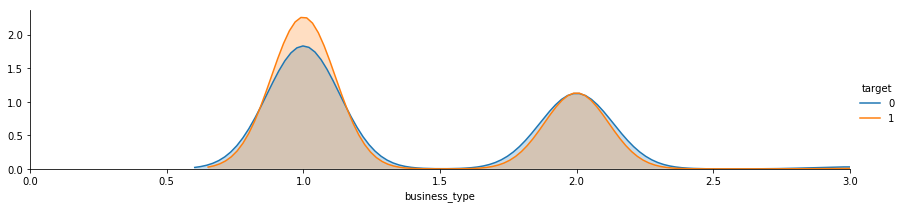

In [160]:
facet = sns.FacetGrid(data1, hue="target",aspect=4)
facet.map(sns.kdeplot,'business_type',shade= True)
facet.set(xlim=(0, data1['business_type'].max()))
facet.add_legend();

- for business_type of manufactureing ,high chances of getting loan

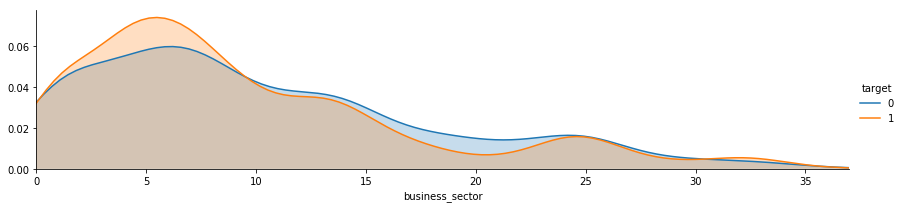

In [161]:
facet = sns.FacetGrid(data1, hue="target",aspect=4)
facet.map(sns.kdeplot,'business_sector',shade= True)
facet.set(xlim=(0, data1['business_sector'].max()))
facet.add_legend();

- for business_sector from 4 to 7 ie Machine omponets ,wood,Fabrications, Food ,they are high chances of getting loan
- for business_sector 20 ie education ,low chances of getting loan

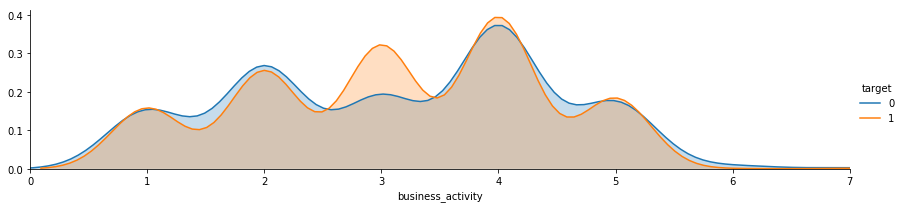

In [162]:
facet = sns.FacetGrid(data1, hue="target",aspect=4)
facet.map(sns.kdeplot,'business_activity',shade= True)
facet.set(xlim=(0, data1['business_activity'].max()))
facet.add_legend();

- for business activity 3 , ie Sales they're high chances of getting loan
- for other business activity the chances of getting loan is 50-50%

In [252]:
#lets create a bar function
def bar_chart(feature):
    yes = data1[data1['target']==1][feature].value_counts()
    no = data1[data1['target']==0][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['yes','no']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

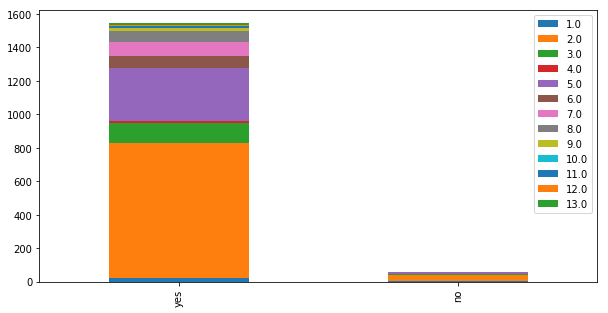

In [253]:
bar_chart('product_code')  
## product code " ICBDS" has higher chances of getting loan

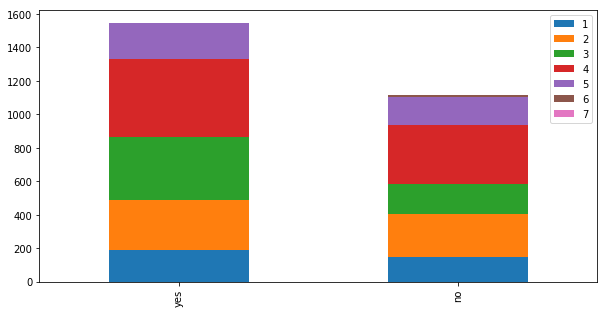

In [255]:
bar_chart('business_activity')

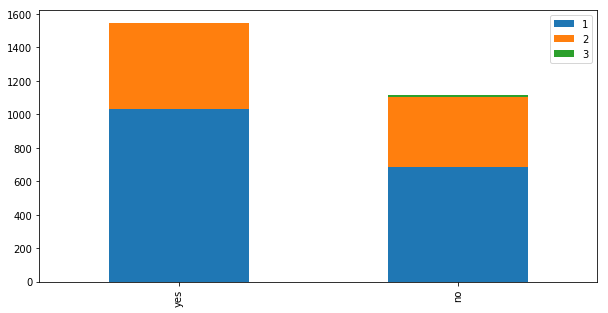

In [256]:
bar_chart('business_type')

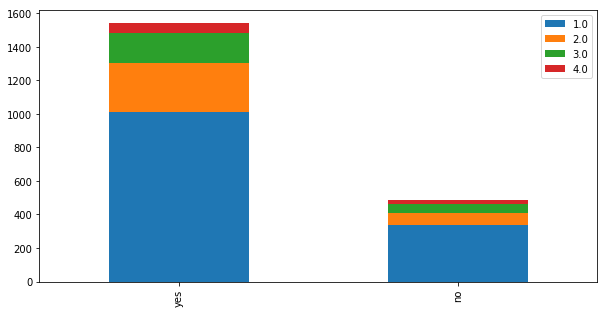

In [257]:
bar_chart('BusinFormalityOfTheBusinessui')  ##  customers with cash and non banked having high no. of sucessfull loan approaval

- importing with mode values is not a currect choice since the values of product_code is significanly varing with hub_id ,Business_activity,Business_type
- i can go with KNN imputation

## Adding a another feature says secured or unsecured product (Feature Engineering)

In [165]:
def get(x):
    if x!=None:
        p=list(x)
        return p[4]
    else:  
        return None

In [166]:
data1['product_type']=data.product_code.map(lambda x : get(x))

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [167]:
data1["product_type"]=data1.product_type.apply(lambda x : "Unsecured" if x=='U' else 'Secured')

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
data1.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,business_type,business_activity,business_sector,net_disbursement_magnitude,transaction_Date,target,product_type
0,5692,TLMFS0000055,17850,6278,2017-03-07,1.0,46,32,1.0,0,1,1,1.0,345909.0,2017-02-28,1,Secured
1,6190,TLWCU0001219,17857,6280,2017-03-07,2.0,32,35,1.0,0,2,2,2.0,144157.0,2017-02-28,1,Unsecured
2,6191,TLAPS0000292,9481,2916,2017-03-07,3.0,32,32,1.0,0,1,3,3.0,484931.0,2017-03-23,1,Secured
3,6192,LCRIU0000019,6597,32,2017-03-10,4.0,32,None,NaN,None,1,4,1.0,683859.0,2017-03-13,1,Unsecured
4,6193,LCRIU0000020,9732,3167,2017-03-13,4.0,32,39,1.0,548,1,1,1.0,896703.0,2017-03-15,1,Unsecured


In [169]:
data1.groupby("product_type").target.value_counts()

product_type  target
Secured       0         1078
              1          653
Unsecured     1          894
              0           37
Name: target, dtype: int64

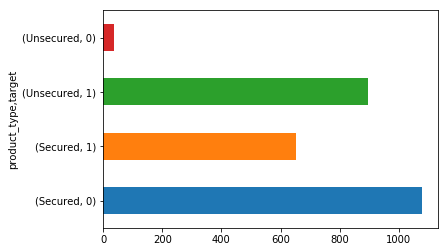

In [170]:
data1.groupby("product_type").target.value_counts().plot(kind="barh")

In [171]:
data1.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,business_type,business_activity,business_sector,net_disbursement_magnitude,transaction_Date,target,product_type
0,5692,TLMFS0000055,17850,6278,2017-03-07,1.0,46,32,1.0,0,1,1,1.0,345909.0,2017-02-28,1,Secured
1,6190,TLWCU0001219,17857,6280,2017-03-07,2.0,32,35,1.0,0,2,2,2.0,144157.0,2017-02-28,1,Unsecured
2,6191,TLAPS0000292,9481,2916,2017-03-07,3.0,32,32,1.0,0,1,3,3.0,484931.0,2017-03-23,1,Secured
3,6192,LCRIU0000019,6597,32,2017-03-10,4.0,32,None,NaN,None,1,4,1.0,683859.0,2017-03-13,1,Unsecured
4,6193,LCRIU0000020,9732,3167,2017-03-13,4.0,32,39,1.0,548,1,1,1.0,896703.0,2017-03-15,1,Unsecured


#### My main aim is to create a model which says what kind of customer is most likely to get loan

In [172]:
## removing unrelevent features
# adding features which explains the loan acceptance or rejection

In [173]:
rm_data=data1.drop(["loan_id","hub_id","screening_date","account_number","customer_id","enterprise_id","net_disbursement_magnitude","transaction_Date"],1)

In [174]:
rm_data.shape

(2662, 9)

In [175]:
rm_data.head()

,product_code,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,business_type,business_activity,business_sector,target,product_type
0,1.0,32,1.0,0,1,1,1.0,1,Secured
1,2.0,35,1.0,0,2,2,2.0,1,Unsecured
2,3.0,32,1.0,0,1,3,3.0,1,Secured
3,4.0,None,NaN,None,1,4,1.0,1,Unsecured
4,4.0,39,1.0,548,1,1,1.0,1,Unsecured


- for imputing missing values ,i'll use KNN imputation

### lets lebel the category variables 

In [176]:
rm_data["product_type"]=rm_data.product_type.map({"Secured":0,"Unsecured":1})

In [177]:
rm_data.head()

,product_code,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,business_type,business_activity,business_sector,target,product_type
0,1.0,32,1.0,0,1,1,1.0,1,0
1,2.0,35,1.0,0,2,2,2.0,1,1
2,3.0,32,1.0,0,1,3,3.0,1,0
3,4.0,None,NaN,None,1,4,1.0,1,1
4,4.0,39,1.0,548,1,1,1.0,1,1


# Handling missing values

In [260]:
data1.isnull().sum()

loan_id                             0
account_number                   1115
customer_id                         0
enterprise_id                       0
screening_date                      0
product_code                     1056
hub_id                              0
ManagAgeui_APP                    703
BusinFormalityOfTheBusinessui     631
ManagCBscoreui_APP                703
business_type                       0
business_activity                   0
business_sector                     2
net_disbursement_magnitude       1117
transaction_Date                 1117
target                              0
product_type                        0
dtype: int64

In [259]:
data.groupby(["hub_id","BusinFormalityOfTheBusinessui","business_activity","business_type"]).product_code.value_counts()

hub_id  BusinFormalityOfTheBusinessui  business_activity  business_type  product_code
3       Cash & Non Banked              Job Work           Manufacturing  TLWCS           1
                                       Job Work & Sales   Manufacturing  TLWCS           6
                                                                         TLWCU           2
                                                                         LCRDU           1
                                       Retail             Trading        TLWCU           6
                                                                         LCRDU           1
                                       Sales              Manufacturing  TLWCS           3
                                                                         TLWCU           3
                                                                         ICWCS           1
                                                                         LCRDU           1
    

## KNN Imputation for Missing Values

In [178]:
#!pip3 install fancyimputer

In [179]:
from fancyimpute import KNN
X_filled_knn = KNN(k=3).fit_transform(rm_data)

Using TensorFlow backend.


Imputing row 1/2662 with 0 missing, elapsed time: 1.270
Imputing row 101/2662 with 4 missing, elapsed time: 1.286
Imputing row 201/2662 with 1 missing, elapsed time: 1.286
Imputing row 301/2662 with 0 missing, elapsed time: 1.286
Imputing row 401/2662 with 4 missing, elapsed time: 1.286
Imputing row 501/2662 with 2 missing, elapsed time: 1.302
Imputing row 601/2662 with 0 missing, elapsed time: 1.302
Imputing row 701/2662 with 0 missing, elapsed time: 1.302
Imputing row 801/2662 with 0 missing, elapsed time: 1.302
Imputing row 901/2662 with 1 missing, elapsed time: 1.317
Imputing row 1001/2662 with 4 missing, elapsed time: 1.317
Imputing row 1101/2662 with 0 missing, elapsed time: 1.317
Imputing row 1201/2662 with 4 missing, elapsed time: 1.317
Imputing row 1301/2662 with 0 missing, elapsed time: 1.333
Imputing row 1401/2662 with 0 missing, elapsed time: 1.333
Imputing row 1501/2662 with 0 missing, elapsed time: 1.333
Imputing row 1601/2662 with 4 missing, elapsed time: 1.348
Imputing 

In [180]:
fix_data=pd.DataFrame(X_filled_knn)

In [181]:
fix_data=round(fix_data)

In [182]:
fix_data.head()

,0,1,2,3,4,5,6,7,8
0,1.0,32.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,2.0,35.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0
2,3.0,32.0,1.0,0.0,1.0,3.0,3.0,1.0,0.0
3,4.0,41.0,1.0,736.0,1.0,4.0,1.0,1.0,1.0
4,4.0,39.0,1.0,548.0,1.0,1.0,1.0,1.0,1.0


In [183]:
fix_data.columns=["product_code","ManagAgeui_APP","BusinFormalityOfTheBusinessui","ManagCBscoreui_APP","business_type","business_activity","business_sector","target","product_type"]

In [203]:
fix_data.head()

,product_code,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,business_type,business_activity,business_sector,target,product_type,credit_score
0,1.0,32.0,1.0,0,1.0,1.0,1.0,1.0,0.0,0
1,2.0,35.0,1.0,0,2.0,2.0,2.0,1.0,1.0,0
2,3.0,32.0,1.0,0,1.0,3.0,3.0,1.0,0.0,0
3,4.0,41.0,1.0,736,1.0,4.0,1.0,1.0,1.0,1
4,4.0,39.0,1.0,548,1.0,1.0,1.0,1.0,1.0,1


In [262]:
features=fix_data.drop(["target","product_code"],1)
target=fix_data["target"]

In [290]:
from sklearn.model_selection import train_test_split

train_x, test_x, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

## Scalling

In [291]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(train_x)
X_train = scaler.transform(train_x)
X_test = scaler.transform(test_x)

## Decision tree classifier

In [292]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
DTClassifier= DecisionTreeClassifier (max_depth=200,criterion='gini',min_samples_leaf=9)
DTClassifier.fit(X_train,y_train)
predicted_labels = DTClassifier.predict(X_test)
accuracy_score= accuracy_score(y_test, predicted_labels)
print(accuracy_score)

0.8367729831144465


## Random Forest Classifier

In [293]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
SEED = 1
model_full_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced',max_features=3, random_state=SEED, n_jobs=-1)
model_full_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [294]:
model_full_rf.score(X_test,y_test)

0.8611632270168855

## Gradient boosting

In [295]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators =200, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [296]:
gbcl.score(X_test,y_test)

0.8630393996247655

In [297]:
predicted_labels=gbcl.predict(X_test)

## SVC

In [298]:
from sklearn import svm
clf = svm.SVC()

In [299]:
clf.fit(X_train,y_train)

C:\Users\sreekar chidurala\Anaconda3\envs\sreekar\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [300]:
clf.score(X_test,y_test)

0.8123827392120075

In [301]:
#!pip3 install scikit-plot

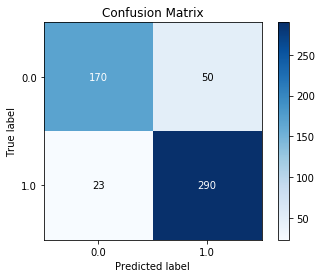

In [302]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,predicted_labels, normalize=False)
plt.show()

In [314]:
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

         0.0       0.86      0.74      0.80       220
         1.0       0.83      0.91      0.87       313

   micro avg       0.84      0.84      0.84       533
   macro avg       0.85      0.83      0.83       533
weighted avg       0.84      0.84      0.84       533



##  lets see if accuracy increases when a new created feature is added.

In [303]:
def getmap(x):
    if x!=None:
        if x==0:
            return 0
        elif x>500 & x<600: 
            return 1
        elif x>600 & x<700:
            return 2
        else:
            return 3
    else:
        return None

In [304]:
fix_data["ManagCBscoreui_APP"]=fix_data.ManagCBscoreui_APP.astype(int)

In [305]:
fix_data['credit_score']=fix_data.ManagCBscoreui_APP.map(lambda x : getmap(x))


- removing ManagCBscoreui_APP feature

In [306]:
features1=fix_data.drop(["target","ManagCBscoreui_APP"],1)
target1=fix_data["target"]

In [307]:
from sklearn.model_selection import train_test_split

train_x1, test_x1, y_train1, y_test1 = train_test_split(features1, target1, test_size=0.2, random_state=0)

In [308]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(train_x1)
X_train1 = scaler.transform(train_x1)
X_test1 = scaler.transform(test_x1)

## Decision Tree Classifier

In [309]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
DTClassifier= DecisionTreeClassifier (max_depth=200,criterion='gini',min_samples_leaf=9)
DTClassifier.fit(X_train1,y_train1)
predicted_labels = DTClassifier.predict(X_test1)
accuracy_score= accuracy_score(y_test1, predicted_labels)
print(accuracy_score)

0.8424015009380863


## Gradient Decent Boosting

In [310]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators =500, random_state=1)
gbcl = gbcl.fit(X_train1, y_train1)

In [311]:
gbcl.score(X_test1,y_test1)

0.8667917448405253

## Random forest Classifier

In [312]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
SEED = 1
model_full_rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=SEED, n_jobs=-1)
model_full_rf.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [313]:
model_full_rf.score(X_test1,y_test1)

0.8611632270168855

In [316]:
predicted=model_full_rf.predict(X_test1)

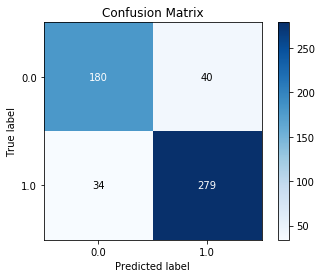

In [317]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test1,predicted, normalize=False)
plt.show()

In [318]:
print(classification_report(y_test1,predicted))

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       220
         1.0       0.87      0.89      0.88       313

   micro avg       0.86      0.86      0.86       533
   macro avg       0.86      0.85      0.86       533
weighted avg       0.86      0.86      0.86       533



In [ ]:
# best score gotten by me is 86.
#since the data is very less, 